In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df = pd.read_csv('all.csv')
df =  df.drop(['All','O+','O-','B+','B-','A+','A-','AB-'], axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,AB+
Date,
2017-01-01,3
2017-01-02,4
2017-01-03,14
2017-01-04,5
2017-01-05,2


In [3]:
df.head()

,AB+
Date,
2017-01-01,3
2017-01-02,4
2017-01-03,14
2017-01-04,5
2017-01-05,2


In [4]:
train, test = df[:-4], df[-4:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(1000, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
182/182 [==============================] - 5s 30ms/step - loss: 0.0456
Epoch 2/180
182/182 [==============================] - 3s 14ms/step - loss: 0.0343
Epoch 3/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0343
Epoch 4/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0336
Epoch 5/180
182/182 [==============================] - 3s 19ms/step - loss: 0.0333: 0s - los
Epoch 6/180
182/182 [==============================] - 3s 16ms/step - loss: 0.0333
Epoch 7/180
182/182 [==============================] - 2s 13ms/step - loss: 0.0334
Epoch 8/180
182/182 [==============================] - 2s 9ms/step - loss: 0.0335
Epoch 9/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0324
Epoch 10/180
182/182 [==============================] - 2s 9ms/step - loss: 0.0338
Epoch 11/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0333
Epoch 12/180
182/182 [==============================] - 3s 16ms/step - loss: 

182/182 [==============================] - 2s 10ms/step - loss: 0.0319
Epoch 100/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0319
Epoch 101/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0320
Epoch 102/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0321
Epoch 103/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0320
Epoch 104/180
182/182 [==============================] - 2s 9ms/step - loss: 0.0319
Epoch 105/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0321
Epoch 106/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0320
Epoch 107/180
182/182 [==============================] - 2s 8ms/step - loss: 0.0319
Epoch 108/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0320
Epoch 109/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0320
Epoch 110/180
182/182 [==============================] - 1s 8ms/step - loss: 0.0316
Epo

In [8]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [9]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

#df.reset_index(inplace=True)
#df_predict.reset_index(inplace=True)
#df_predict.head(3)

,Prediction
Date,
2020-01-01,5.750442
2020-01-02,6.295662
2020-01-03,6.030141
2020-01-04,6.357529


In [10]:
df.head(12)

,AB+
Date,
2017-01-01,3
2017-01-02,4
2017-01-03,14
2017-01-04,5
2017-01-05,2
2017-01-06,7
2017-01-07,1
2017-01-08,9
2017-01-09,7


In [11]:
df_test = pd.concat([df,df_predict], axis=1)

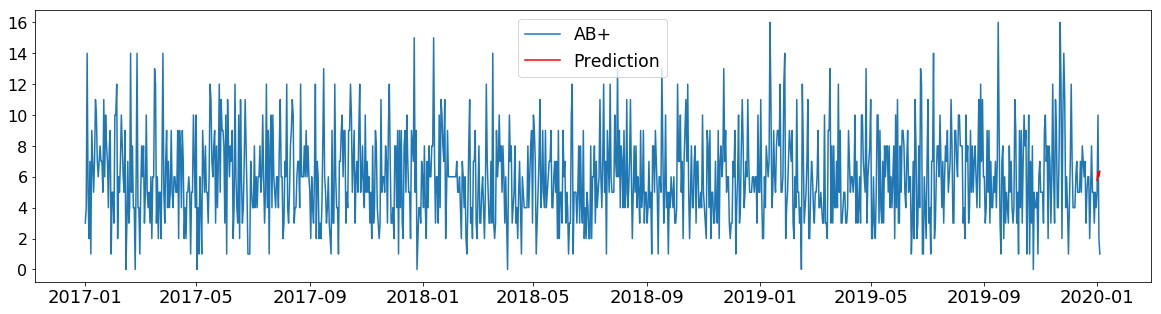

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AB+'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [13]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [3.84806581]


In [14]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0310
Epoch 2/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0308
Epoch 3/180
183/183 [==============================] - 1s 7ms/step - loss: 0.0311
Epoch 4/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0310
Epoch 5/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0314
Epoch 6/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0309
Epoch 7/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0308
Epoch 8/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0307
Epoch 9/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0307
Epoch 10/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0306
Epoch 11/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0305
Epoch 12/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0307
Epoch 13/1

183/183 [==============================] - 2s 13ms/step - loss: 0.0279
Epoch 99/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0274
Epoch 100/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0275
Epoch 101/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0275
Epoch 102/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0274
Epoch 103/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0277
Epoch 104/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0267
Epoch 105/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0276
Epoch 106/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0269
Epoch 107/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0278
Epoch 108/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0268
Epoch 109/180
183/183 [==============================] - 2s 11ms/step - loss: 0.

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,AB+
2020-01-11,NaN
2020-01-18,NaN
2020-01-25,NaN
2020-02-01,NaN


In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


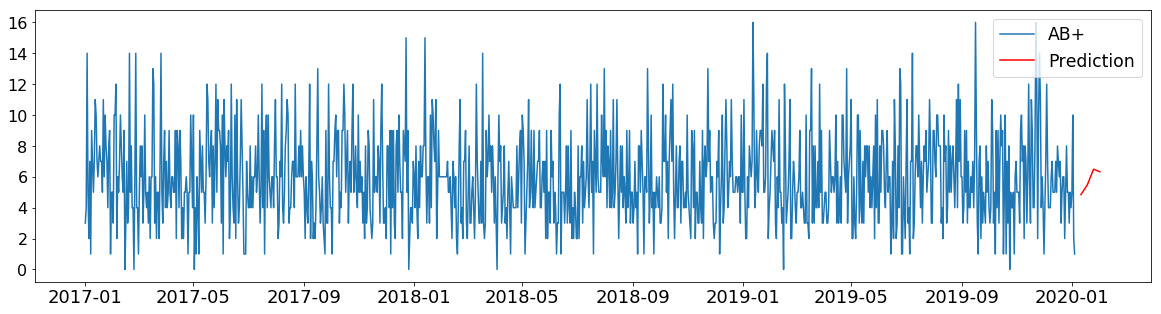

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AB+'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [18]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

             AB+  Prediction
Date                        
2017-01-01   3.0         NaN
2017-01-02   4.0         NaN
2017-01-03  14.0         NaN
2017-01-04   5.0         NaN
2017-01-05   2.0         NaN
2017-01-06   7.0         NaN
2017-01-07   1.0         NaN
2017-01-08   9.0         NaN
2017-01-09   7.0         NaN
2017-01-10   5.0         NaN
2017-01-11   7.0         NaN
2017-01-12  11.0         NaN
2017-01-13  10.0         NaN
2017-01-14   7.0         NaN
2017-01-15   6.0         NaN
2017-01-16   7.0         NaN
2017-01-17   8.0         NaN
2017-01-18   7.0         NaN
2017-01-19   7.0         NaN
2017-01-20   5.0         NaN
2017-01-21  11.0         NaN
2017-01-22   6.0         NaN
2017-01-23  10.0         NaN
2017-01-24   8.0         NaN
2017-01-25   7.0         NaN
2017-01-26   4.0         NaN
2017-01-27   8.0         NaN
2017-01-28   9.0         NaN
2017-01-29   1.0         NaN
2017-01-30   5.0         NaN
...          ...         ...
2019-12-10   7.0         NaN
2019-12-11   5

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

In [19]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-29',
 '2019-12-30',
 '2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01']

In [20]:
import pickle
pickle.dump(model, open('LSTMTS.pkl','wb'))

In [21]:
model1 = pickle.load(open('LSTMTS.pkl','rb'))
print(df_predict)
#print(model.predict([[294.4631853,269.2113163,259.0677778,801.762786,10,857728.9379,2.31E+08,6.45E+07,-1.58E-04,0.318021887,0.944691378,911.1851229,115.1132337,38754.36871,125.6205738,795.0629418,769.0343165,758.783161,802.5212002,105.7078282,109.0908925,38192.10039,99.75624612,0,0,0.739668222,0.795160951,0.39753938]]))
#print(model.score(X_test,y_test))

            Prediction
2020-01-11    4.846044
2020-01-18    5.463904
2020-01-25    6.488769
2020-02-01    6.323427


In [22]:
import joblib

joblib.dump(scaler, "AB+data_transformer.joblib")
model.save("AB+model.h5")

In [23]:
from datetime import timedelta, date
EndDate = date.today() + timedelta(days=7)
